# Defining the pericentromeric region of chromosomes

In [1]:
import pandas as pd

## Data preprocessing

In [2]:
# Liste des noms de génomes
genome_names = [
    "C24", "Lag1-2", "Lag1-7", "Krazo_1", "OOE3-1", "Castelfeld_4_210", "Castelfeld_4_211", "CATS6", "Boo2-3", 
    "Dolna_1_40", "IP-Fun0", "IP-Gra0", "IP_Her12", "IP_Vdm", "Esp1-11", "IP_Nog17", "Kru3", "Lov5", "NFA10", 
    "Qar8a", "Sri3", "Sij1", "Yeg7", "T930", "Dolna1-10", "En_D", "Tac_0", "UKSW06_257", "627RMX-1MN5", 
    "D-UKSW06-491", "KER5", "NYL7", "TOM-01", "UKSW06-541", "Di-G", "IP-Alm-0", "IP-Moa-0", "IP-Pun0", 
    "Ler_0", "LI-WP-039", "MIA-1", "Eden5", "IP-Per0", "KNO2-54", "Nyl13", "T890", "Angso-74-430", "Ba5-1", 
    "Cvi-0", "Eden1", "IP-Vaz0", "IP-Vis0", "LI-EF-011", "OOE2-1", "Taa14", "UKID93", "UKSW06-240", "Zu-0", 
    "Bach2-1", "Bur-0", "Kas-2", "Lag2-4", "MNF-Pin40", "Fri1", "Samm", "TV30", "Lov1", "Anzo", "Eds9", 
    "IP-Pal0", "IP-Pan0", "Lerik1-7", "Lerik2-7", "IP-Cat0", "IP-Cem0", "IP-Tol7", "Kas1", "Yeg8", "OOE23", 
    "Etna2", "MIA-5", "Ta_0", "Tsu0", "IP_Hum2", "Sf_2", "T610", "col_g2-1_dd", "Ct_1", "T1160"
]

In [3]:
filtered_te_fname = 'outputs/89_summaries/filtered_te_data.csv'

In [4]:
GENOMES_PATH = "data/89_summaries" # chemin vers les données

### ONLY IF NEEDED: Create Filtered TE data file
Only run this section of the code if `outputs/89_summaries/filtered_te_data.csv` does not exist (or you want to recompute it).

In [ ]:
# Noms des fichiers des 89 génomes
genome_files = [(f"{GENOMES_PATH}/{genome_n}/{genome_n}.summary.bed") for genome_n in genome_names]

In [ ]:
# Noms des colonnes pour tous les génomes
noms_colonnes = [
    "Chr", "TE.start", "TE.end", "TE.strand", "TE.id", "TE.family", "TE.superfamily",
    "up.Gene1.start", "up.Gene1.end", "up.Gene1.id", "up.Gene1.strand", "up.Gene1.distance",
    "up.Gene2.start", "up.Gene2.end", "up.Gene2.id", "up.Gene2.strand", "up.Gene2.distance",
    "down.Gene1.start", "down.Gene1.end", "down.Gene1.id", "down.Gene1.strand", "down.Gene1.distance",
    "down.Gene2.start", "down.Gene2.end", "down.Gene2.id", "down.Gene2.strand", "down.Gene2.distance",
    "up.Meth.CG.0_100", "up.Meth.CHG.0_100", "up.Meth.CHH.0_100", "up.Meth.CG.100_200",
    "up.Meth.CHG.100_200", "up.Meth.CHH.100_200", "up.Meth.CG.200_300", "up.Meth.CHG.200_300",
    "up.Meth.CHH.200_300", "down.Meth.CG.0_100", "down.Meth.CHG.0_100", "down.Meth.CHH.0_100",
    "down.Meth.CG.100_200", "down.Meth.CHG.100_200", "down.Meth.CHH.100_200", "down.Meth.CG.200_300",
    "down.Meth.CHG.200_300", "down.Meth.CHH.200_300", "TE.Meth.CG", "TE.Meth.CHG", "TE.Meth.CHH",
    "up.context.CG.0_100", "up.context.CHG.0_100", "up.context.CHH.0_100", "up.context.CG.100_200",
    "up.context.CHG.100_200", "up.context.CHH.100_200", "up.context.CG.200_300", "up.context.CHG.200_300",
    "up.context.CHH.200_300", "down.context.CG.0_100", "down.context.CHG.0_100", "down.context.CHH.0_100",
    "down.context.CG.100_200", "down.context.CHG.100_200", "down.context.CHH.100_200", "down.context.CG.200_300",
    "down.context.CHG.200_300", "down.context.CHH.200_300", "TE.context.CG", "TE.context.CHG", "TE.context.CHH"
]

#### Filtering out TEs that are too close to the previous TE

In [ ]:
MIN_TE_DISTANCE = 500

In [ ]:
# Liste pour stocker les DataFrames filtrés
filtered_dfs = []

# compteur de TEs avant filtrage
num_tes = 0

for genome_file in genome_files:    
    # Charger le fichier
    df = pd.read_csv(genome_file, delimiter="\t", skiprows=1, header=None, low_memory=False)
    num_tes += len(df)
    
    # Appliquer les noms des colonnes
    df.columns = noms_colonnes
        
    # Grouper les TE par chromosome
    grouped = df.groupby('Chr')  
    for chr_name, group in grouped:
        # Trier les TE par leur position de début (TE.start)
        group = group.sort_values(by='TE.start').reset_index(drop=True)

        # Liste pour stocker les indices des TE à conserver
        to_keep = []

        # Variable pour garder la fin du dernier TE conservé
        last_end = -float('inf')

        # Parcourir chaque ligne du DataFrame
        for i, row in group.iterrows():
            if row['TE.start'] - last_end > MIN_TE_DISTANCE:
                to_keep.append(i)
                last_end = row['TE.end']

        # Filtrer le DataFrame pour conserver uniquement les TE sélectionnés
        filtered_group = group.loc[to_keep]
        filtered_dfs.append(filtered_group)
        
# Combiner les DataFrames filtrés pour chaque génome
filtered_te_df = pd.concat(filtered_dfs).reset_index(drop=True)

print(f'Original number of TEs: {num_tes}')
print(f'Number of TEs after filter: {len(filtered_te_df)}')

#### Filtering out TEs that are too short

In [ ]:
MIN_TE_LENGTH = 200

In [ ]:
# Calculer la longueur de chaque TE
filtered_te_df['TE_length'] = filtered_te_df['TE.end'] - filtered_te_df['TE.start']

# Ne garder que les TEs dont la longuer est supérieure à MIN_TE_LENGTH
filtered_te_df = filtered_te_df.loc[filtered_te_df['TE_length'] >= MIN_TE_LENGTH]

filtered_te_df.drop(columns=['TE_length'], inplace=True)
filtered_te_df.shape

#### Save filtered TEs to file

In [ ]:
# Sauvegarder le DataFrame filtré dans un nouveau fichier CSV
filtered_te_df.to_csv(filtered_te_fname, index=False)

### ONLY IF NEEDED: load Filtered TE data

In [5]:
filtered_te_df = pd.read_csv(filtered_te_fname, low_memory=False)

### Loading Liftoff gene data

In [6]:
# Liste des noms de fichiers genes
genes_filenames = [(f"{GENOMES_PATH}/{genome_n}/Genes/{genome_n}_LiftOver.TAIR10_genes.genes.bed") for genome_n in genome_names]

In [7]:
# Liste pour stocker les DataFrames des fichiers genes
genes_dfs = []

# Parcourir chaque fichier de genes
for filename in genes_filenames:
    # Lire le contenu du fichier en tant que DataFrame en ne conservant que les deux premières colonnes
    df = pd.read_csv(filename, usecols=[0, 1], delimiter="\t", header=None)
    
    # Renommer les colonnes
    df.columns = ["Chr_RagTag", "Position"]
    
    # Ajouter le DataFrame à la liste
    genes_dfs.append(df)
# Maintenant, vous avez tous les DataFrames des fichiers genes avec les colonnes renommées dans la liste genes_dfs

In [8]:
# Dictionnaire pour stocker les DataFrames divisés par chromosome pour chaque génome
gene_genome_chr_dfs = {}

# Parcourir chaque DataFrame de gènes
for genome_name, df in zip(genome_names, genes_dfs):
    # Créer un dictionnaire temporaire pour stocker les DataFrames divisés par chromosome
    genome_chr_dfs = {}
    
    # Grouper les lignes par chromosome (Chr_RagTag)
    grouped = df.groupby("Chr_RagTag")
    
    # Parcourir chaque groupe (chaque chromosome)
    for chr_name, group in grouped:
        # Ajouter ce DataFrame dans le dictionnaire temporaire
        genome_chr_dfs[chr_name] = group.reset_index(drop=True)
    
    # Ajouter ce dictionnaire dans le dictionnaire principal
    gene_genome_chr_dfs[genome_name] = genome_chr_dfs

# Maintenant, vous avez un dictionnaire gene_genome_chr_dfs qui contient pour chaque génome, un dictionnaire contenant les DataFrames divisés par chromosome.
# Par exemple, pour accéder au DataFrame du chromosome "Chr1_RagTag" du génome "C24", vous pouvez utiliser gene_genome_chr_dfs["C24"]["Chr1_RagTag"].

## Gene density inflexion points

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.signal import argrelextrema

In [20]:
from matplotlib import lines # pour créer des légendes manuellement (cf Legend Guide on matplotlib.org)

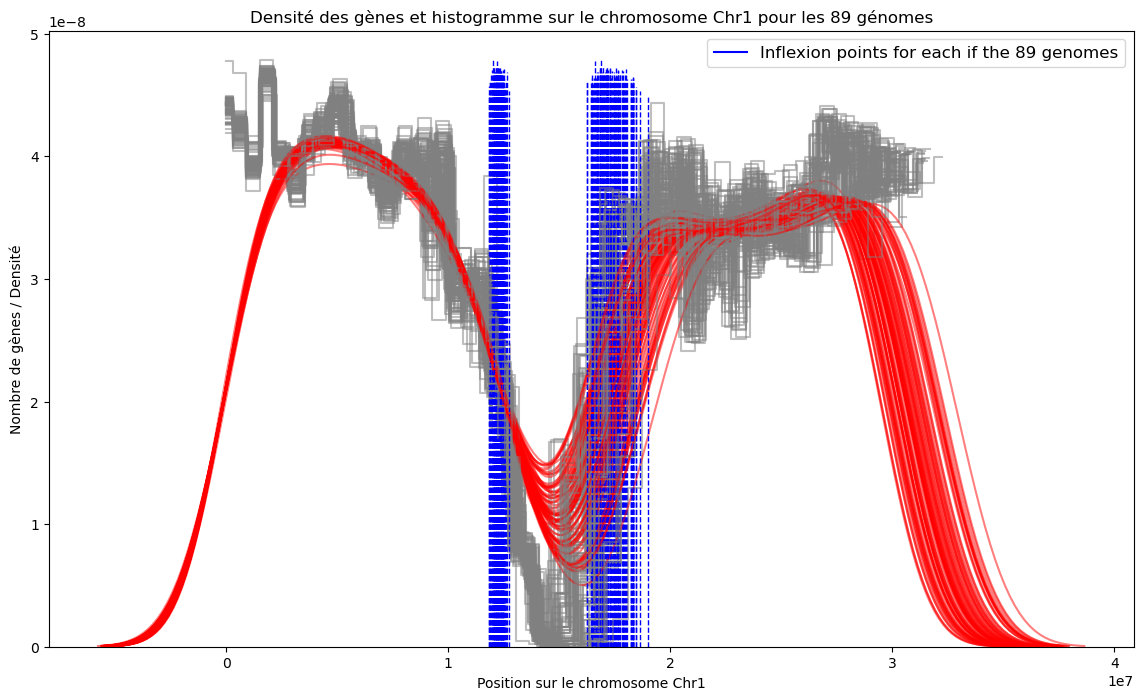

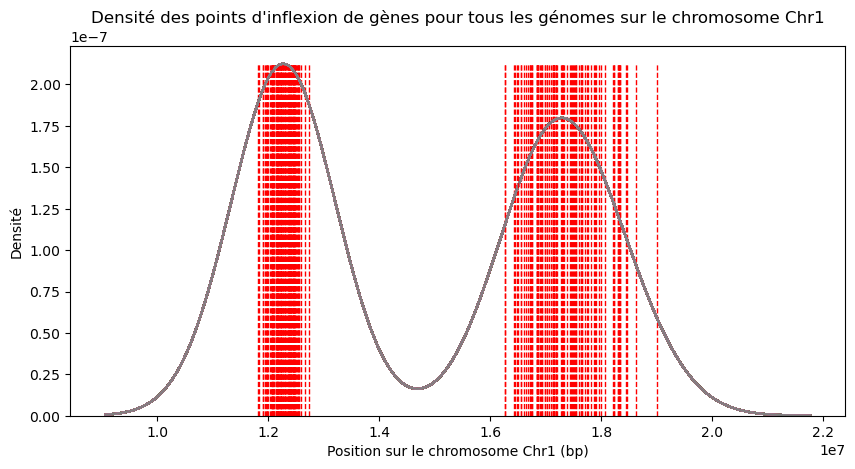

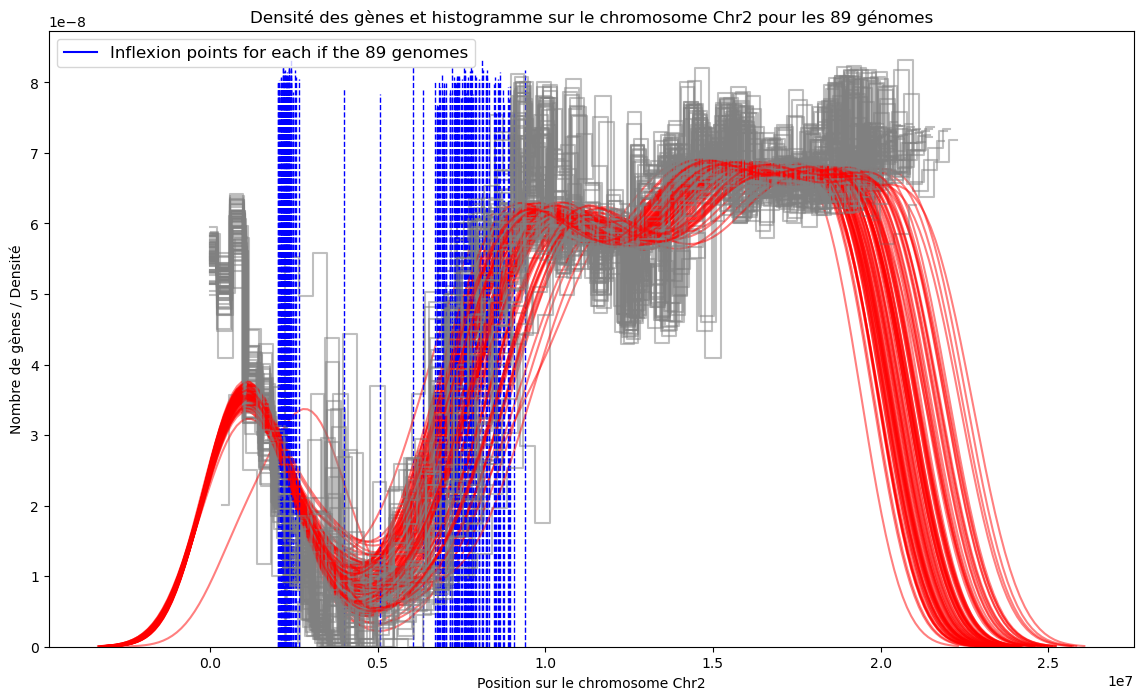

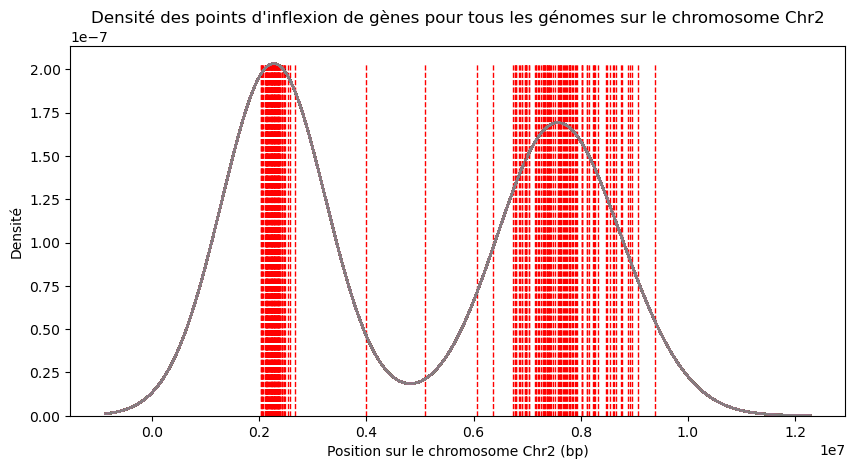

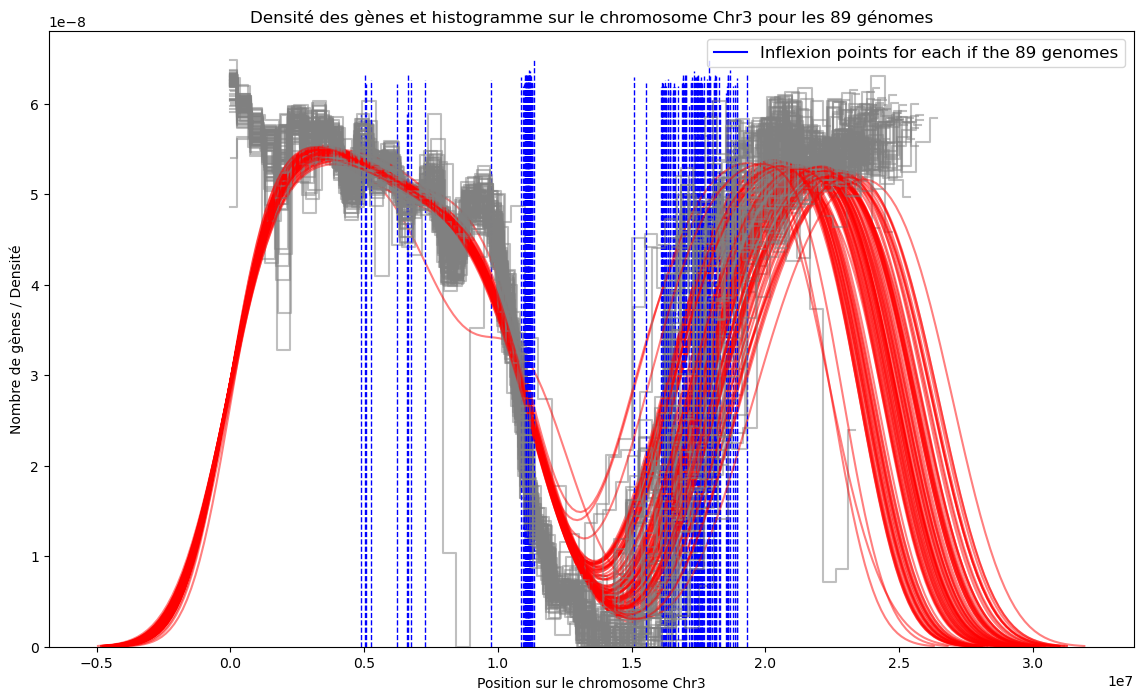

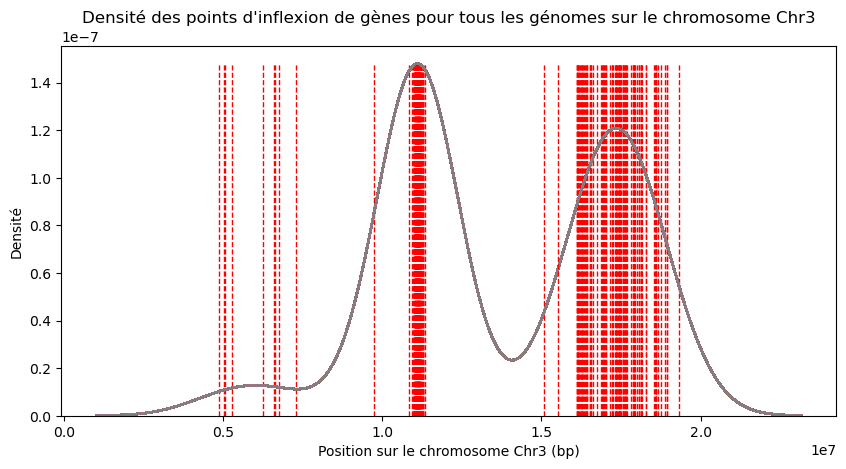

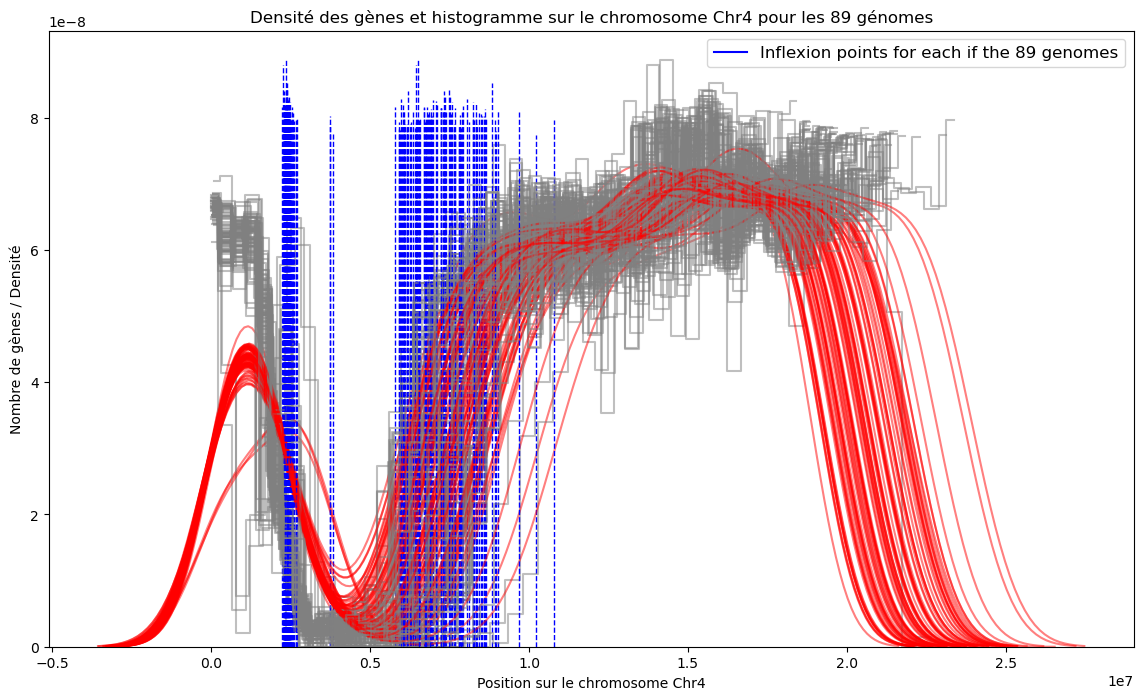

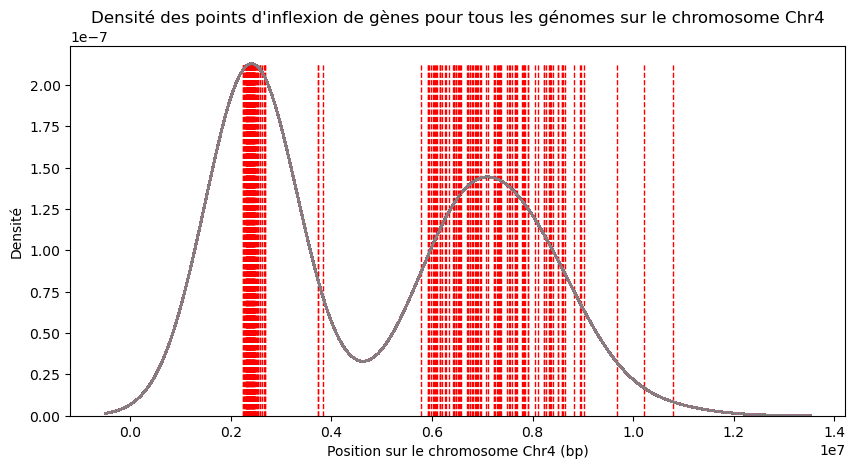

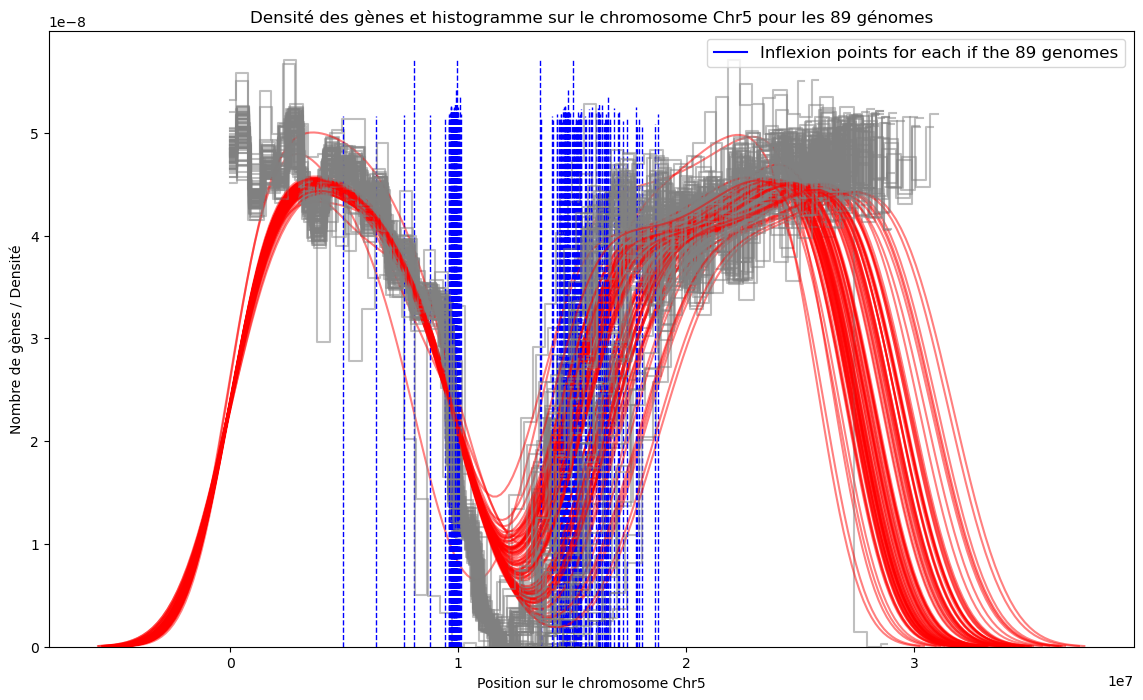

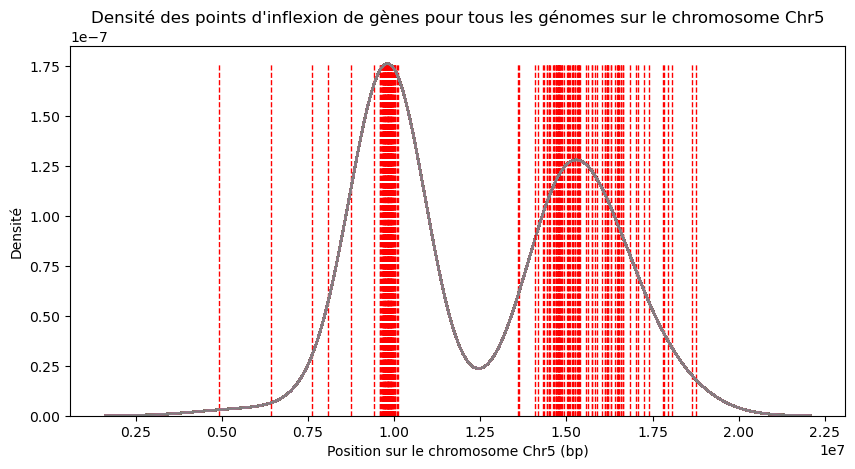

In [25]:
# Liste des chromosomes à traiter
chromosomes = ["Chr1", "Chr2", "Chr3", "Chr4", "Chr5"]

# Boucle pour traiter chaque chromosome
for chr_name in chromosomes:
    # Listes pour stocker les données de densité de tous les génomes pour ce chromosome
    all_gene_density_data = []
    inflexion_data = {}

    # Parcourir chaque génome pour ce chromosome
    for genome_name in genome_names:
        gene_chr_df = gene_genome_chr_dfs[genome_name][f"{chr_name}_RagTag"]

        if not gene_chr_df.empty:
            # Calculer la densité des gènes
            plt.figure()  # Créer une nouvelle figure pour chaque densité pour éviter l'accumulation de courbes
            kde_gene = sns.kdeplot(gene_chr_df['Position'], bw_method=0.18, color='red', alpha=0.2)
            x_gene = kde_gene.get_lines()[0].get_xdata()
            y_gene = kde_gene.get_lines()[0].get_ydata()
            all_gene_density_data.append((x_gene, y_gene))

            # Fermer le plot pour éviter les interférences dans les plots suivants
            plt.close()

            # Calculer la dérivée seconde de la densité des gènes
            y_gene_second_derivative = np.gradient(np.gradient(y_gene))

            # Trouver les points d'inflexion (zéros de la dérivée seconde)
            inflexion_indices = np.where(np.diff(np.sign(y_gene_second_derivative)))[0]
            inflexion_x = x_gene[inflexion_indices]

            # Stocker seulement les deuxième et troisièmes points d'inflexion s'ils existent
            if len(inflexion_x) > 3:
                inflexion_data[genome_name] = inflexion_x[1:3]  # Points d'inflexion 2 et 3

    # Concaténer les positions des points d'inflexion de tous les génomes pour ce chromosome
    all_inflexion_points = []
    for inflexion in inflexion_data.values():
        all_inflexion_points.extend(inflexion)

    # Tracer les densités des gènes et l'histogramme pour les génomes sur ce chromosome
    plt.figure(figsize=(14, 8))

    # Parcourir chaque génome pour ce chromosome
    for genome_name in genome_names:
        gene_chr_df = gene_genome_chr_dfs[genome_name][f"{chr_name}_RagTag"]

        # Calculer l'histogramme des positions des gènes pour ce chromosome
        if not gene_chr_df.empty:
            hist_gene, bins_gene = np.histogram(gene_chr_df['Position'], bins=50, density=True)
            x_gene_hist = bins_gene[:-1]
            y_gene_hist = hist_gene
            plt.step(x_gene_hist, y_gene_hist, where='mid', color='gray', alpha=0.5)#, label=f'{genome_name} histogram')

            # Tracer la densité des gènes par-dessus
            sns.kdeplot(gene_chr_df['Position'], bw_method=0.18, color='red', alpha=0.5)#, label=f'{genome_name} density')

            # Ajouter les droites verticales pour les points d'inflexion
            if genome_name in inflexion_data:
                for inflexion_point in inflexion_data[genome_name]:
                    plt.vlines(inflexion_point, ymin=0, ymax=max(y_gene_hist), colors='blue', linestyles='--', linewidth=1)

    # Ajouter les étiquettes et le titre
    plt.xlabel(f'Position sur le chromosome {chr_name}')
    plt.ylabel('Nombre de gènes / Densité')
    plt.title(f'Densité des gènes et histogramme sur le chromosome {chr_name} pour les 89 génomes')
    # Ajouter la légende
    inflexion_line = lines.Line2D([], [], color='blue', label="Inflexion points for each if the 89 genomes")
    plt.legend(handles=[inflexion_line], fontsize=12)
    plt.savefig(f"outputs/89_summaries/gene_density_chr{chr_name}.png", bbox_inches='tight') # remplacer par .pdf ou .svg si pbs de résolution
    plt.show()

    # Tracer la densité des points d'inflexion pour ce chromosome
    plt.figure(figsize=(10, 4.8))
    sns.kdeplot(all_inflexion_points, color='blue')

    # Ajouter les droites verticales pour les points d'inflexion
    for inflexion_point in all_inflexion_points:
        plt.vlines(inflexion_point, ymin=0, ymax=max(sns.kdeplot(all_inflexion_points).get_lines()[0].get_ydata()), colors='red', linestyles='--', linewidth=1)

    plt.title(f"Densité des points d'inflexion de gènes pour tous les génomes sur le chromosome {chr_name}")
    plt.xlabel(f"Position sur le chromosome {chr_name} (bp)")
    plt.ylabel("Densité")
    plt.show()